## PREDICTION PIPELINE

In [1]:
import os
import numpy as np
import PIL
import cv2
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import time
import tensorflow_hub as hub

In [2]:
# Mapping of class indices to labels
int_to_label = {v: k for k, v in {'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4, 'street': 5}.items()}

In [3]:
def plot_sample(X, label, title):
    plt.imshow(X)
    plt.xlabel(int_to_label[label])
    plt.title(title)

In [4]:
# Prediction function with image display
def predict_image(model, image_path, actual_label=None):
    # Preprocess the image
    origonal_image = PIL.Image.open(image_path)
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_normalized = img_resized / 255.0
    img_expanded = np.expand_dims(img_normalized, axis=0)  # Add batch dimension

    # Make a prediction
    predictions = model.predict(img_expanded)
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Get the readable label
    actual_label = image_path.split('/')[-2]
    predicted_label = int_to_label[predicted_class]

    # Plot the original image
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(origonal_image)
    #plt.xlabel(actual_label)
    plt.title(f'Prediction: {predicted_label}')    

    return predicted_label


## Load the model

In [5]:
from tensorflow.keras.models import load_model
inception = load_model('inception.h5', custom_objects={'KerasLayer': hub.KerasLayer})

In [6]:
# Example usage of prediction function
paths = [
    "C:/Users/ys726/Desktop/DL/datasets/intel/seg_pred/233.jpg",
    "C:/Users/ys726/Desktop/DL/datasets/intel/seg_pred/242.jpg", 
    "C:/Users/ys726/Desktop/DL/datasets/intel/seg_pred/676.jpg",
    "C:/Users/ys726/Desktop/DL/datasets/intel/seg_pred/1101.jpg",
    "C:/Users/ys726/Desktop/DL/datasets/intel/seg_pred/1388.jpg",
    "C:/Users/ys726/Desktop/DL/datasets/intel/seg_pred/1409.jpg"
]

1/1 [==============================] - 0s 64ms/step


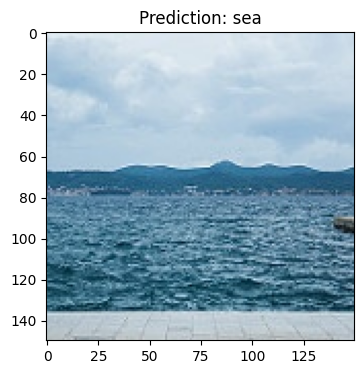

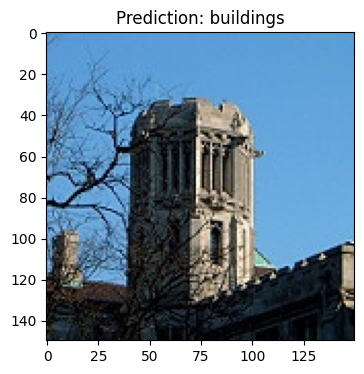

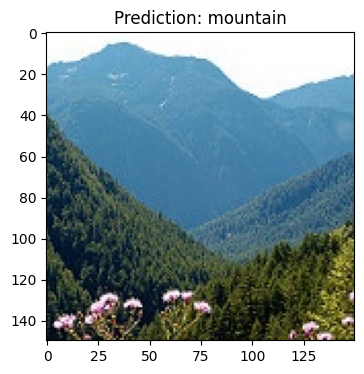

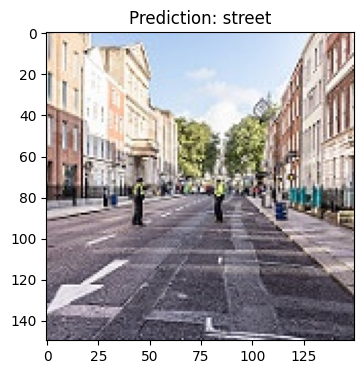

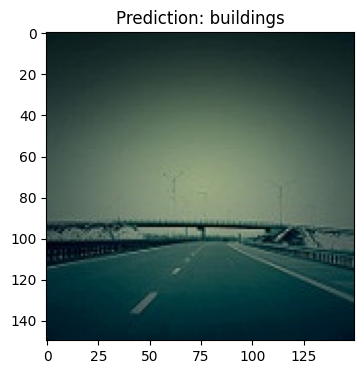

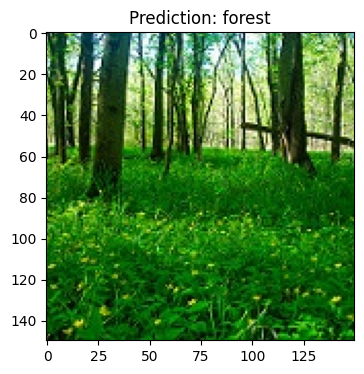

In [7]:
# Process and plot images
for path in paths:
    predict_image(inception, path)